# Data Augmentation

## Augmentation Visualization

### Visualization Function 

In [22]:
import matplotlib.pyplot as plt
def visualize(original_image, augmented_images):
  plt.figure(figsize=(12, 4))

  # Original image
  plt.subplot(1, 4, 1)
  plt.imshow(original_image)
  plt.title("Original image")
  plt.axis('off')

  # Augmented images
  for j, aug_img in enumerate(augmented_images):
      plt.subplot(1, 4, j+2)
      plt.imshow(aug_img)
      plt.title(f"Augmented image {j+1}")
      plt.axis('off')

  plt.tight_layout()
  plt.show()

### Visualizing Augmentation

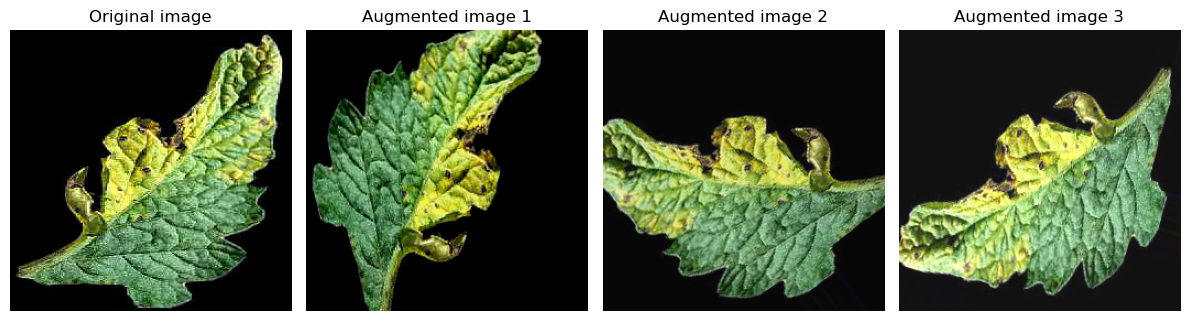

In [74]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=90,             # Random rotation in degrees
    zoom_range=0.1,                # Random zoom
    horizontal_flip=True,          # Random horizontal flip
    brightness_range=[0.9, 1.1],     # Random brightness changes
    channel_shift_range=30.0       # Random channel shifts (can mimic slight contrast changes)
)

# Load and prepare the image
image = load_img(r"D:\Virtual Environments\Pattern Recognition\processed dataset\Tomato___Early_blight\Tomato___Early_blight47.jpg")
image_array = img_to_array(image)
image_array = image_array.reshape((1,) + image_array.shape)  # Add batch dimension

# Generate 3 augmented images and store them in a list
augmented_images = []
for i, batch in enumerate(datagen.flow(image_array, batch_size=1)):
    # 'batch' is a numpy array of shape (1, height, width, channels)
    augmented_images.append(batch[0].astype('uint8'))
    if i >= 2:  # Stop after 3 augmented images
        break

# Plot the original image and the 3 augmented images side-by-side
visualize(image, augmented_images)


## Automating Augmentation 

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image
import shutil

# input_directory = r"D:\Virtual Environments\Pattern Recognition\segmented dataset\train"  
# output_directory = r"D:\Virtual Environments\Pattern Recognition\augmented dataset\train"  
num_augmented = 3  

def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                count += 1
    return count

datagen = ImageDataGenerator(
    rotation_range=90,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1],
    channel_shift_range=30.0
)

for root, dirs, files in os.walk(input_directory):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            input_image_path = os.path.join(root, file)
            image = load_img(input_image_path)
            image_array = img_to_array(image)
            image_array = image_array.reshape((1,) + image_array.shape)  # Add batch dimension

            # Re-create subdirectory structure in the augmented output folder
            relative_path = os.path.relpath(root, input_directory)
            save_dir = os.path.join(output_directory, relative_path)
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)

            original_image_save_path = os.path.join(save_dir, file)
            shutil.copy2(input_image_path, original_image_save_path)

            augmented_count = 0
            for batch in datagen.flow(image_array, batch_size=1, seed=42):
                augmented_count += 1
                # Convert batch (which is a numpy array) back to image
                aug_image = batch[0].astype('uint8')
                aug_image = Image.fromarray(aug_image)
                # Create a unique filename
                base_name, ext = os.path.splitext(file)
                new_file_name = f"{base_name}_aug_{augmented_count}{ext}"
                aug_image.save(os.path.join(save_dir, new_file_name))
                if augmented_count >= num_augmented:
                    break
            print(f"Augmented {augmented_count} images for: {input_image_path}")

# Print total images before and after augmentation
input_image_count = count_images(input_directory)
print("Total images in input directory before augmentation:", input_image_count)
output_image_count = count_images(output_directory)
print("Total images in output directory after augmentation:", output_image_count)

Augmented 3 images for: D:\Virtual Environments\Pattern Recognition\segmented dataset\train\Tomato___Bacterial_spot\Tomato___Bacterial_spot1.jpg
Augmented 3 images for: D:\Virtual Environments\Pattern Recognition\segmented dataset\train\Tomato___Bacterial_spot\Tomato___Bacterial_spot10.jpg
Augmented 3 images for: D:\Virtual Environments\Pattern Recognition\segmented dataset\train\Tomato___Bacterial_spot\Tomato___Bacterial_spot1000.jpg
Augmented 3 images for: D:\Virtual Environments\Pattern Recognition\segmented dataset\train\Tomato___Bacterial_spot\Tomato___Bacterial_spot1001.jpg
Augmented 3 images for: D:\Virtual Environments\Pattern Recognition\segmented dataset\train\Tomato___Bacterial_spot\Tomato___Bacterial_spot1003.jpg
Augmented 3 images for: D:\Virtual Environments\Pattern Recognition\segmented dataset\train\Tomato___Bacterial_spot\Tomato___Bacterial_spot1005.jpg
Augmented 3 images for: D:\Virtual Environments\Pattern Recognition\segmented dataset\train\Tomato___Bacterial_spot\T